In [1]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
sns.set(style="darkgrid")

import pandas as pd
import os,sys
import math

%matplotlib inline

import datetime
import time
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics as mt
from sklearn.metrics import (accuracy_score, 
                             classification_report, 
                             f1_score,
                             confusion_matrix, 
                             roc_auc_score,
                             roc_curve,
                             auc,
                             precision_recall_curve,
                             average_precision_score
                            )

In [2]:
from IPython.core.display import HTML
from IPython.display import HTML, display
display(HTML("<style>.container { width:100% !important; }</style>"))

style_path = '.'

css = open(f'{style_path}/style-table.css').read() + open(f'{style_path}/style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
pd.set_option('max_columns', None)

In [4]:
df = pd.read_csv('bank-additional-full.csv', sep = ';')
df.drop('duration', axis=1, inplace=True)
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [5]:
df['y'] = df['y'].replace({'yes':1, 'no':0})
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1


In [6]:
df['y'].value_counts(normalize=True)

0    0.887346
1    0.112654
Name: y, dtype: float64

In [7]:
positive_ratio = 0.112

## Overall positive percentage is only 11.2%

In [8]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

## No missing values in dataset

In [9]:
df.loc[df['pdays']==999, 'pdays'] = 0

In [10]:
df.describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,2.567593,0.221229,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,2.770014,1.348874,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,1.000000,0.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,2.000000,0.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,3.000000,0.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,56.000000,27.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [11]:
df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [12]:
data = df.copy()

## Show distribution of numeric features

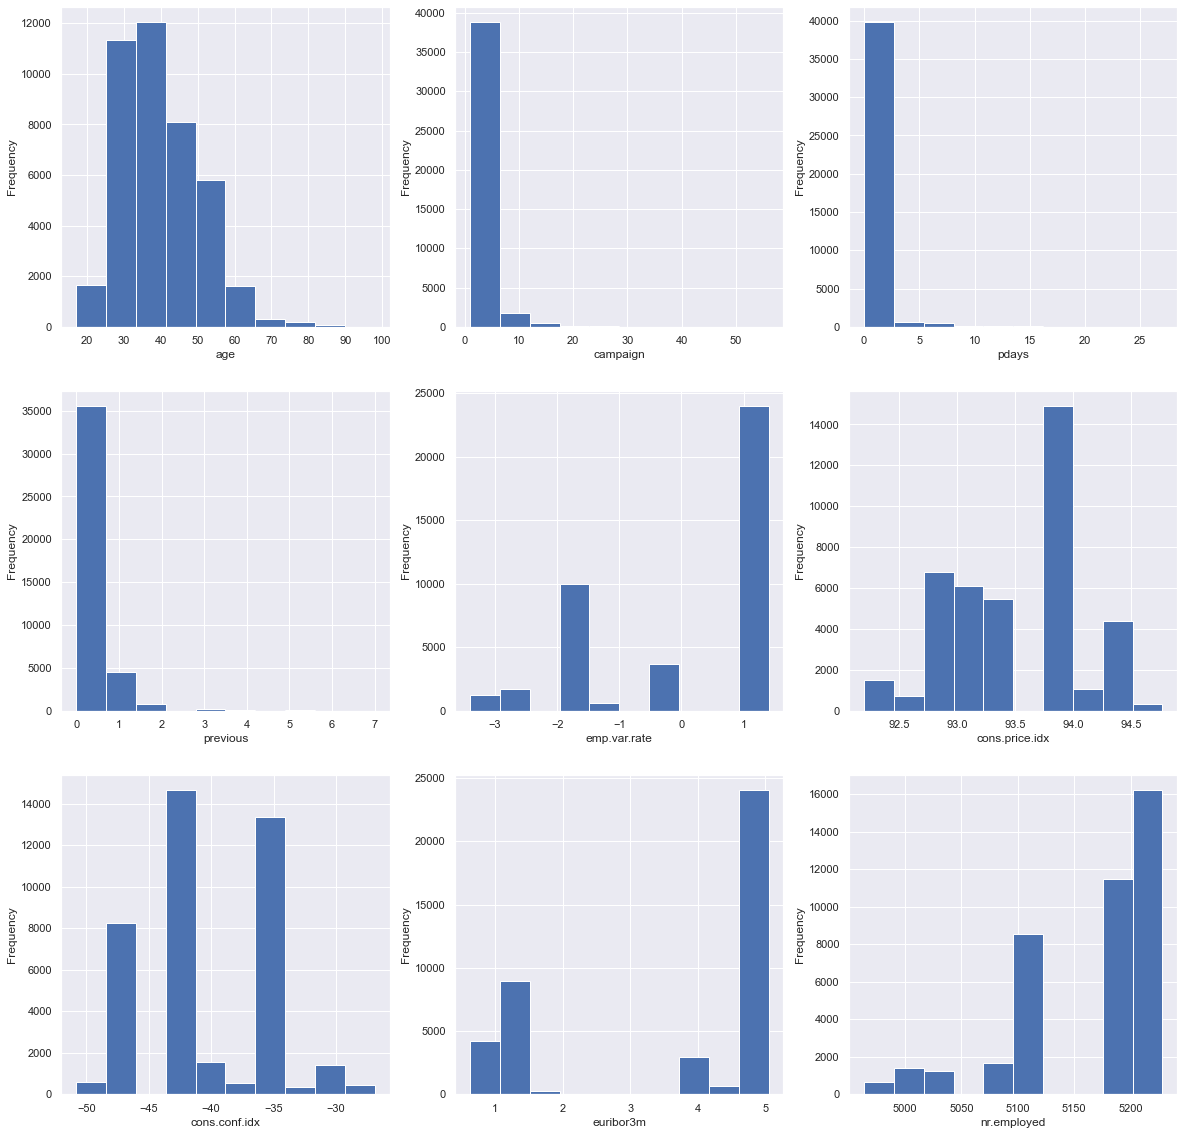

In [13]:
f, axes = plt.subplots(3, 3, figsize = (20, 20))
axes = axes.flatten()

count = 0
for col in data.columns[:]:
    if (data[col].dtypes != 'object') and col != 'y':
        data[col].plot.hist(ax=axes[count])
        axes[count].set_xlabel(col)
        count += 1

## Negative clients tends to be older, age peaked around 40 yeards old
## Positive clients tends to be younger, age peaked around 30 years old. 

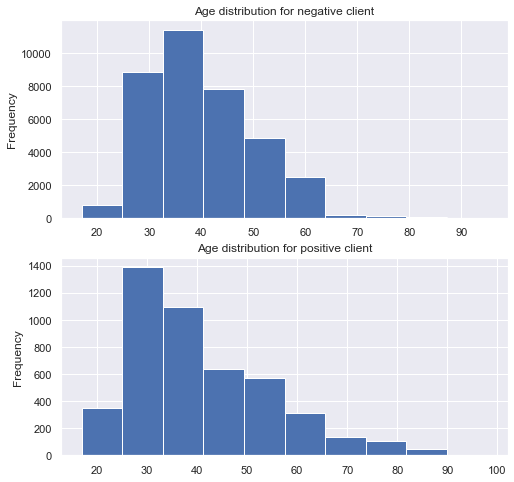

In [14]:
f, axes = plt.subplots(2, 1, figsize = (8, 8))
axes = axes.flatten()


_ = data.loc[data['y'] == 0, 'age'].plot.hist(ax = axes[0], title = 'Age distribution for negative client')
_ = data.loc[data['y'] == 1, 'age'].plot.hist(ax = axes[1], title = 'Age distribution for positive client')

In [15]:

data['cum_y'] = np.cumsum(df['y'])
data['cum_y_div500'] = data['cum_y'] / 500
data['month'] = data['month'].replace({'may':5,
                                       'jun':6,
                                       'jul':7,
                                       'aug':8,
                                       'oct':10,
                                       'nov':11,
                                       'dec':12,
                                       'mar':3,
                                       'apr':4,
                                       'sep':9                                                   
                                      })

In [16]:
data.head(2)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,cum_y,cum_y_div500
0,56,housemaid,married,basic.4y,no,no,no,telephone,5,mon,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0,0.0
1,57,services,married,high.school,unknown,no,no,telephone,5,mon,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0,0.0


<AxesSubplot:xlabel='index'>

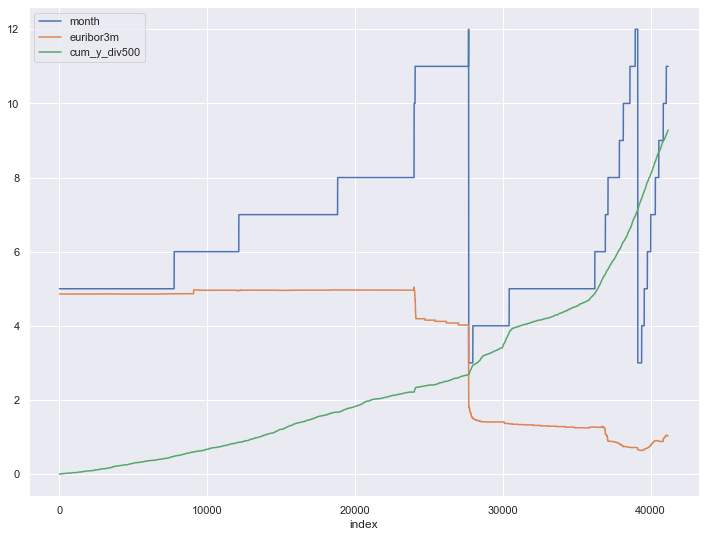

In [17]:
data.reset_index().iloc[:].plot(x='index', y=['month', 'euribor3m','cum_y_div500'], grid=True, figsize=(12, 9))

## Based on data source (https://core.ac.uk/download/pdf/55631291.pdf) and comparing with historical Euribor3m data, we can confirm that the dataset covers date ranging from May 2008 to Nov 2010

![title](euribor_rates.png)

## We will use all data before June 2009 as training data (88% of dataset) and rest of the dataset as test data to evaludate model performance, training data ending at index 36224

In [18]:
data.iloc[36223:36225]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,cum_y,cum_y_div500
36223,27,technician,single,university.degree,no,no,no,cellular,5,thu,1,0,0,nonexistent,-1.8,92.893,-46.2,1.270,5099.1,0,2431,4.862
36224,60,admin.,married,university.degree,no,yes,no,cellular,6,mon,3,3,1,success,-2.9,92.963,-40.8,1.266,5076.2,1,2432,4.864


In [19]:
n_split = 36224 # cutoff index between train and test


In [20]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y', 'cum_y', 'cum_y_div500'],
      dtype='object')

## All data features can be classified into 3 groups:

1) User_profile, this is information about the user: age, job, marital, education, default, housing, loan

2) Contact information, this is information about previous and current contact: campaign, pdays, previous, contact, month, day_of_week, poutcome

3) Economic indicators: this is indicator about overall market and consumer behavior: emp.var.rate, cons.price.idx, conf.idx, euribor3m, nr.empoloyed 

In [21]:
user_feat_orig = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan']
contact_feat_orig = ['campaign', 'pdays', 'previous', 'contact', 'month', 'day_of_week', 'poutcome', 'day']
economic_feat_orig =  ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

## Economic indicators are correlated

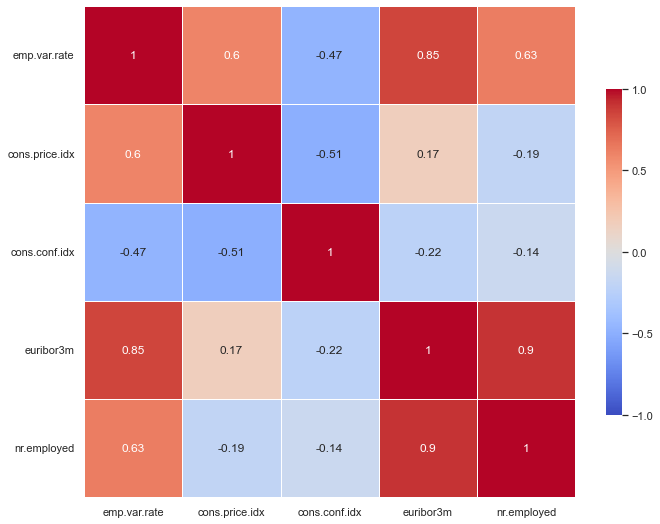

In [22]:
hmap = data[economic_feat_orig].drop_duplicates().corr()
mask = np.zeros_like(hmap, dtype=bool)
f, ax = plt.subplots(figsize=(11, 15)) 
heatmap = sns.heatmap(hmap, 
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4, 
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': 12})

ax.set_yticklabels(hmap.columns, rotation = 0)
ax.set_xticklabels(hmap.columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

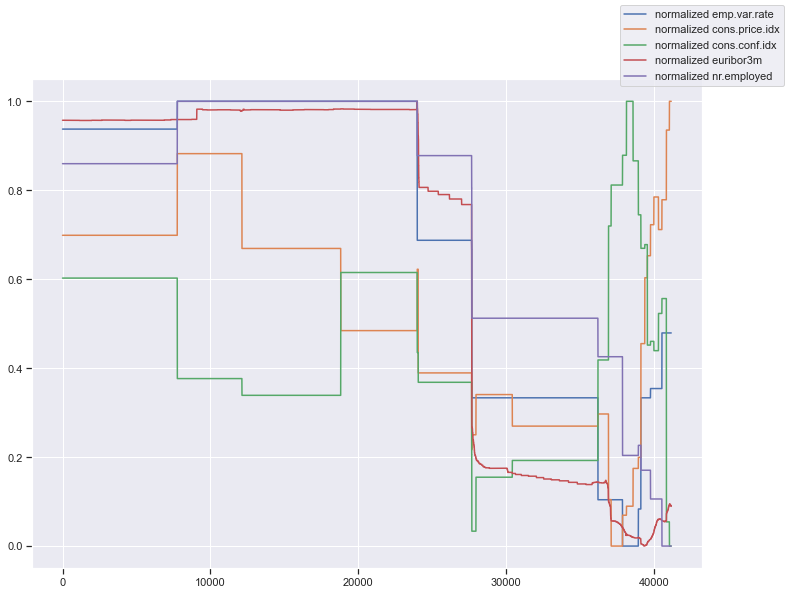

In [23]:
fig = plt.figure()
for cols in economic_feat_orig:    
    d = data[cols]
    d = (d - min(d)) / (max(d) - min(d))
    d.plot(grid=True, figsize=(12, 9), label = f'normalized {cols}')
fig.legend()

## For each categorical feature (job, education, etc), we can check following:
For clients in different groups of this feature, what is the percentage that they are positive users? For example, for all clients that are student, what is the percentage that they are positive. Keep in mind that overall positive rate is only 11%. So if the positive rate in a given group is more than 11%, it is more than average for the entire dataset

We also split this in train and test dataset to see if there is any difference between the two datasets


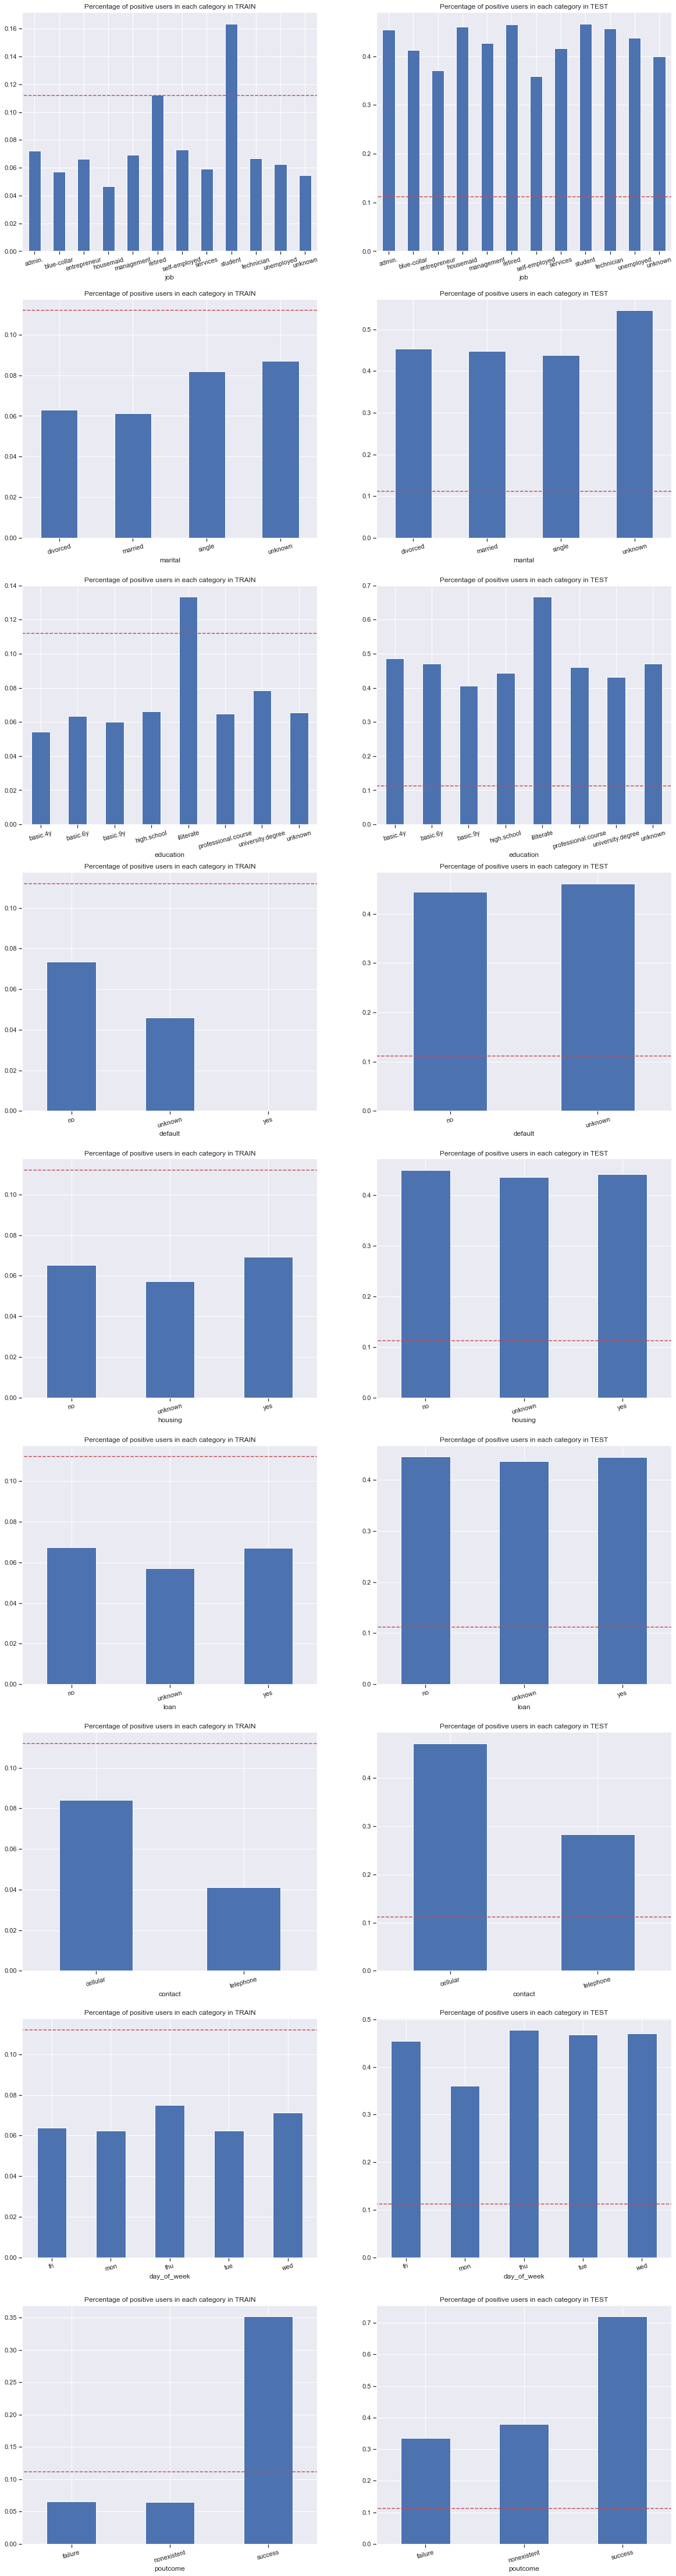

In [24]:
f, axes = plt.subplots(9, 2, figsize = (20, 80))
axes = axes.flatten()

count = 0
cat_cols = []
for col in data.columns[:]:
    if (data[col].dtypes == 'object'):
        cat_cols.append(col)
        tmpdf = data.iloc[:n_split].groupby([col])['y'].value_counts(normalize=True)
        tmpdf = tmpdf.unstack(-1).iloc[:, 1]
        tmpdf.plot.bar(rot = 15, ax = axes[2*count], grid = True, title = 'Percentage of positive users in each category in TRAIN')
        n = tmpdf.shape[0]
        axes[2*count].hlines(positive_ratio, -1, n, colors='r', linestyles='dashed')

        tmpdf = data.iloc[n_split:].groupby([col])['y'].value_counts(normalize=True)
        tmpdf = tmpdf.unstack(-1).iloc[:, 1]
        tmpdf.plot.bar(rot = 15, ax = axes[2*count+1], grid = True, title = 'Percentage of positive users in each category in TEST')
        n = tmpdf.shape[0]
        axes[2*count+1].hlines(positive_ratio, -1, n, colors='r', linestyles='dashed')
        
        
        count += 1

## It is obvious that the positive rate is much higher in test dataset. We can calculate the positive rate in each dataset

In [25]:
y_train, y_test = data['y'][:n_split], data['y'][n_split:]

In [26]:
y_train.value_counts(normalize=True)

0    0.93289
1    0.06711
Name: y, dtype: float64

In [27]:
y_test.value_counts(normalize=True)

0    0.554996
1    0.445004
Name: y, dtype: float64

## The positive rate in training is only 6.7%, comparing with 44.5% in test. This is a significant increase!!

## For each categorical feature (job, education, etc), we can also check following:
1) For clients in different groups of this feature, what is the percentage that they are positive users? For example, for all clients that are student, what is the percentage that they are positive. Keep in mind that overall positive rate is only 11%. So if the positive rate in a given group is more than 11%, it is more than average


2) For all positive users, what percentage of users fall into this group? For example, for all positive users, what percentage of these users are student?

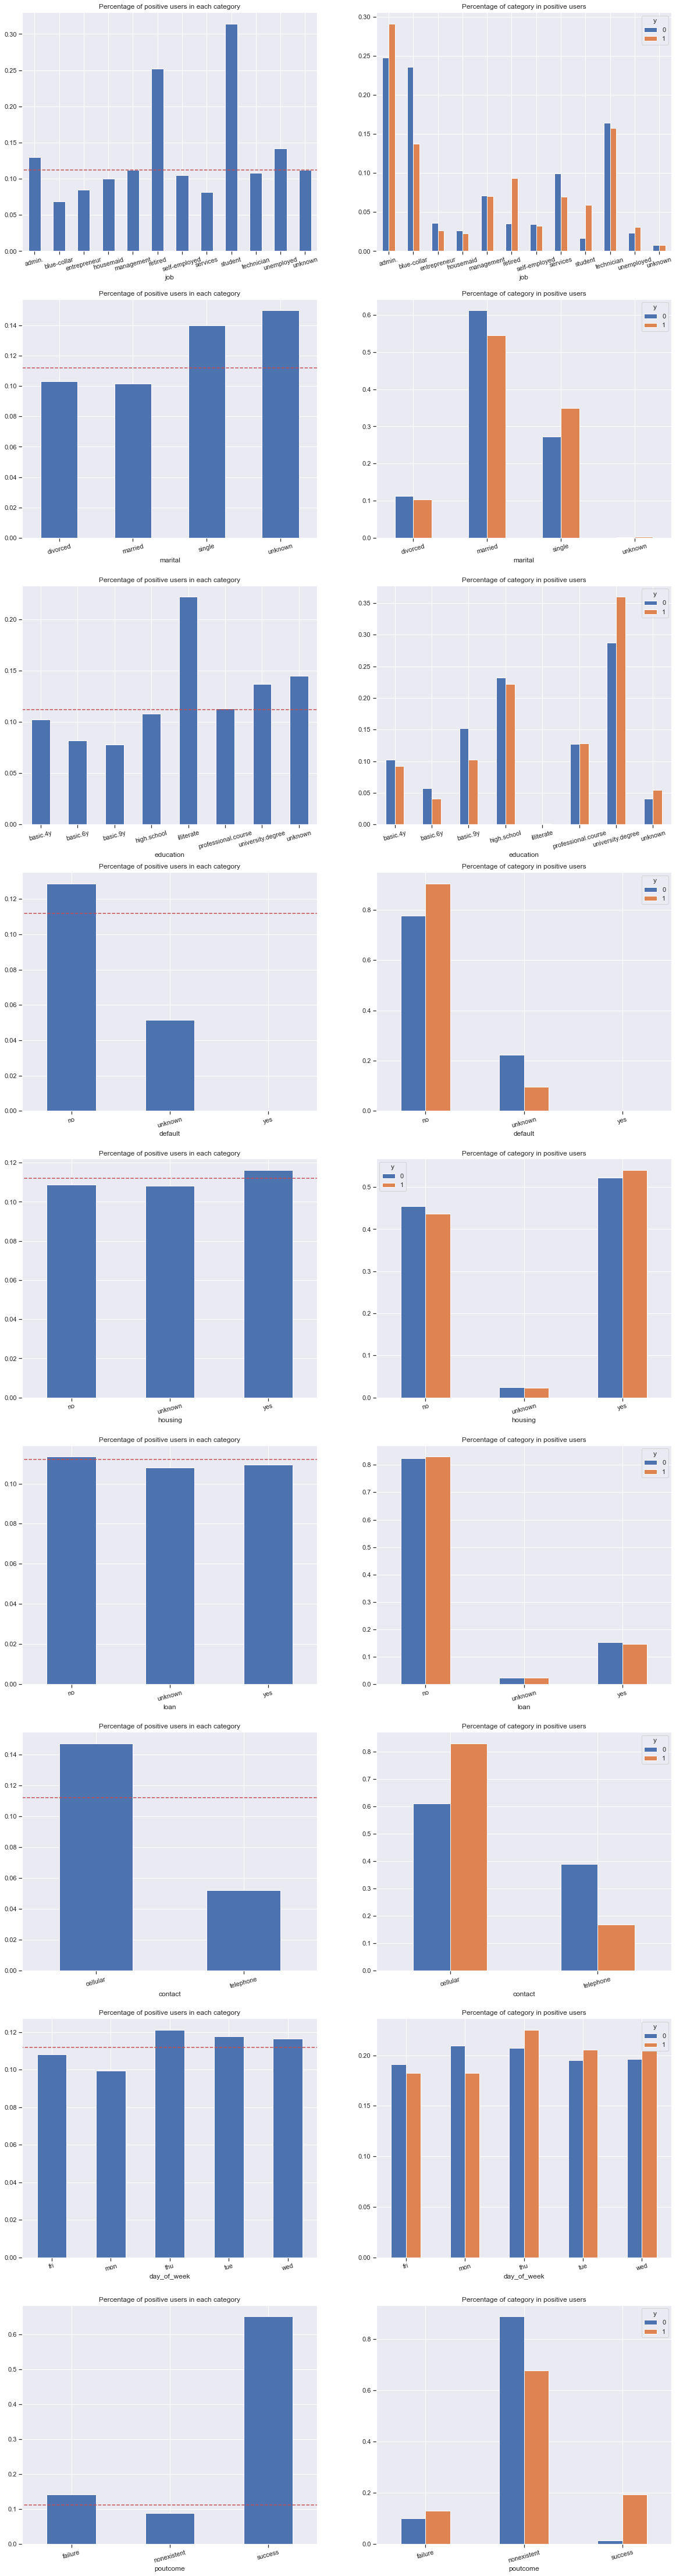

In [28]:
f, axes = plt.subplots(9, 2, figsize = (20, 80))
axes = axes.flatten()

count = 0
cat_cols = []
for col in data.columns[:]:
    if (data[col].dtypes == 'object'):
        cat_cols.append(col)
        tmpdf = data.groupby([col])['y'].value_counts(normalize=True)
        tmpdf = tmpdf.unstack(-1).iloc[:, 1]
        tmpdf.plot.bar(rot = 15, ax = axes[2*count], grid = True, title = 'Percentage of positive users in each category')
        n = tmpdf.shape[0]
        axes[2*count].hlines(positive_ratio, -1, n, colors='r', linestyles='dashed')

        
        tmpdf = data.groupby('y')[col].value_counts(normalize=True)
        tmpdf = tmpdf.unstack(0)
        tmpdf.plot.bar(rot = 15, ax = axes[2*count+1], grid = True, title = 'Percentage of category in positive users')
        
        
        count += 1

## Apply one-hot encoding to categorical features

In [29]:
data_dummy = pd.get_dummies(data[cat_cols], drop_first=True)
data_dummy

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,marital_unknown,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_unknown,default_yes,housing_unknown,housing_yes,loan_unknown,loan_yes,contact_telephone,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0
1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0
2,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0
4,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
41184,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
41185,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0
41186,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [30]:
data_encode = pd.concat([data, data_dummy], axis = 1)
data_encode.drop(cat_cols, inplace= True, axis=1)
data_encode

,age,month,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,cum_y,cum_y_div500,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,marital_unknown,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_unknown,default_yes,housing_unknown,housing_yes,loan_unknown,loan_yes,contact_telephone,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,5,1,0,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0.000,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0
1,57,5,1,0,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0.000,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0
2,37,5,1,0,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0.000,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0
3,40,5,1,0,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0.000,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0
4,56,5,1,0,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0.000,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,11,1,0,0,-1.1,94.767,-50.8,1.028,4963.6,1,4639,9.278,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
41184,46,11,1,0,0,-1.1,94.767,-50.8,1.028,4963.6,0,4639,9.278,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
41185,56,11,2,0,0,-1.1,94.767,-50.8,1.028,4963.6,0,4639,9.278,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0
41186,44,11,1,0,0,-1.1,94.767,-50.8,1.028,4963.6,1,4640,9.280,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [31]:
user_feat = []
contact_feat = []
economic_feat = []

for icol in data_encode.columns:
    icolsplit = icol.split('_')[0]
    if icolsplit in user_feat_orig:
        user_feat.append(icol)
    elif icolsplit in contact_feat_orig:
        contact_feat.append(icol)
    elif icolsplit in economic_feat_orig:
        economic_feat.append(icol)
        
print(f'user features are {user_feat}')
print(f'-'*40)
print(f'contact features are {contact_feat}')
print(f'-'*40)
print(f'economic features are {economic_feat}')


user features are ['age', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'job_unknown', 'marital_married', 'marital_single', 'marital_unknown', 'education_basic.6y', 'education_basic.9y', 'education_high.school', 'education_illiterate', 'education_professional.course', 'education_university.degree', 'education_unknown', 'default_unknown', 'default_yes', 'housing_unknown', 'housing_yes', 'loan_unknown', 'loan_yes']
----------------------------------------
contact features are ['month', 'campaign', 'pdays', 'previous', 'contact_telephone', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed', 'poutcome_nonexistent', 'poutcome_success']
----------------------------------------
economic features are ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


## Define some helper functions to be used later

In [32]:
def plot_pr_curve(model_names, precision_forests, recall_forests, ap_scores):
    fig, ax = plt.subplots(1,1, figsize=(12,9))
    for index, (model_name, p, r, a) in enumerate(zip(model_names, precision_forests, recall_forests, ap_scores)):
        feat_name, n_trees, max_depth = model_name
        plt.plot(r,p, label = f'{feat_name}, number of trees = {n_trees} , max_depth = {max_depth}, ap_score = {a:.2f}')
    plt.title('Precision Recall Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])    
    ax.set_aspect('equal', adjustable='box')

    plt.legend(fontsize=15, loc = 'lower left')
    plt.tight_layout() 

In [33]:
def evaluate_model(clf, n_est, max_d, X_train, X_test, y_train, y_test, print_detail = False):
    print(f'evaluate for {n_est} estimators with max_depth = {max_d}')
    for dset, ex, ey in zip(['train', 'test'], [X_train, X_test], [y_train, y_test]):
        #print(X_train.shape, X_test.shape)

        y_hat = clf.predict(ex) # get test set precitions
        y_score=clf.predict_proba(ex)

        
        
        fpr, tpr, _ = roc_curve(ey, y_hat)
        auc_score = auc(fpr,tpr)
        precision_forest, recall_forest, thresholds_forest = precision_recall_curve(ey, y_score[:,1])
        ap_score = average_precision_score(ey,y_score[:,1])
        conf = mt.confusion_matrix(ey,y_hat)
        
        if print_detail:
            tn, fp, fn, tp = conf.ravel()
            precision = tp / (tp + fp)
            recall = tp / (tp + fn)
            f1_score = 2 * precision * recall / (precision + recall)

            #print(f'AUC score for {dset} is : {auc_score:.2f}')
            print(f"Confusion matrix for {dset}: ")
            print(conf)
            print(f'{dset}, Precision = {precision:.2f} Recall = {recall:.2f}, F1 score = {f1_score:.2f}, Average precision score = {ap_score:.2f}')
            print (f"Classification Report for {dset}")
            print(classification_report(ey, y_hat, zero_division = 0))
    return precision_forest, recall_forest, ap_score

In [34]:
def plot_feat_imp(column_names, feature_importances):
    feat_imp = pd.DataFrame({'feature_name': column_names, 'feature_importance' : feature_importances})
    feat_imp.sort_values('feature_importance', ascending=False, inplace=True)
    feat_imp.reset_index(drop=True, inplace=True)
    feat_imp.iloc[:k,:].plot.bar(x='feature_name', rot=15, figsize=(12,9), grid=True)

In [35]:
def scan_parameters(n_estimators, max_depths, feature_list, print_detail = False):
    precision_forests = []
    recall_forests = []
    ap_scores = []
    model_names = []


    for feat_name in feature_list:

        feat_inc = feature_dict[feat_name]
        X = data_encode[feat_inc]
        y = data_encode["y"]

        X_train, X_test = X.iloc[:n_split, :], X.iloc[n_split:, :]
        y_train, y_test = y[:n_split], y[n_split:]
        print(X_train.shape, X_test.shape)    

        for n_est in n_estimators:
            for max_d in max_depths:
                model_names.append((feat_name, n_est, max_d))
                forest = RandomForestClassifier(n_estimators=n_est,
                                                max_depth=max_d,                                            
                                                random_state=0, 
                                                class_weight = "balanced")


                forest.fit(X_train,y_train)

                precision_forest, recall_forest, ap_score = evaluate_model(forest, n_est, max_d, X_train, X_test, y_train, y_test, print_detail=print_detail)            
                precision_forests.append(precision_forest)
                recall_forests.append(recall_forest)
                ap_scores.append(ap_score)
                #print(precision_forest, recall_forest, ap_score)
    plot_pr_curve(model_names, precision_forests, recall_forests, ap_scores) 
    plot_feat_imp(X_test.columns, forest.feature_importances_)
    
    return (precision_forests, recall_forests, ap_scores)

In [36]:
data_encode

,age,month,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,cum_y,cum_y_div500,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,marital_unknown,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_unknown,default_yes,housing_unknown,housing_yes,loan_unknown,loan_yes,contact_telephone,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,5,1,0,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0.000,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0
1,57,5,1,0,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0.000,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0
2,37,5,1,0,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0.000,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0
3,40,5,1,0,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0.000,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0
4,56,5,1,0,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0.000,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,11,1,0,0,-1.1,94.767,-50.8,1.028,4963.6,1,4639,9.278,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
41184,46,11,1,0,0,-1.1,94.767,-50.8,1.028,4963.6,0,4639,9.278,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
41185,56,11,2,0,0,-1.1,94.767,-50.8,1.028,4963.6,0,4639,9.278,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0
41186,44,11,1,0,0,-1.1,94.767,-50.8,1.028,4963.6,1,4640,9.280,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [37]:
k = 10 # number of important features to plot
feature_dict = {}
feature_dict['all_features'] = user_feat + contact_feat + economic_feat
feature_dict['selected_features'] = user_feat + contact_feat + ['euribor3m']

## Using all available features and 100 trees, scan for different values of max_depths

(36224, 44) (4964, 44)
evaluate for 100 estimators with max_depth = 1
evaluate for 100 estimators with max_depth = 2
evaluate for 100 estimators with max_depth = 4
evaluate for 100 estimators with max_depth = 6
evaluate for 100 estimators with max_depth = 10


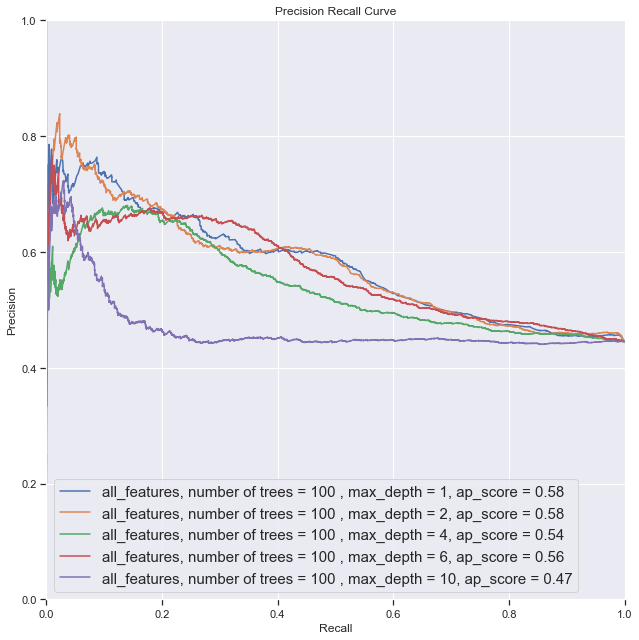

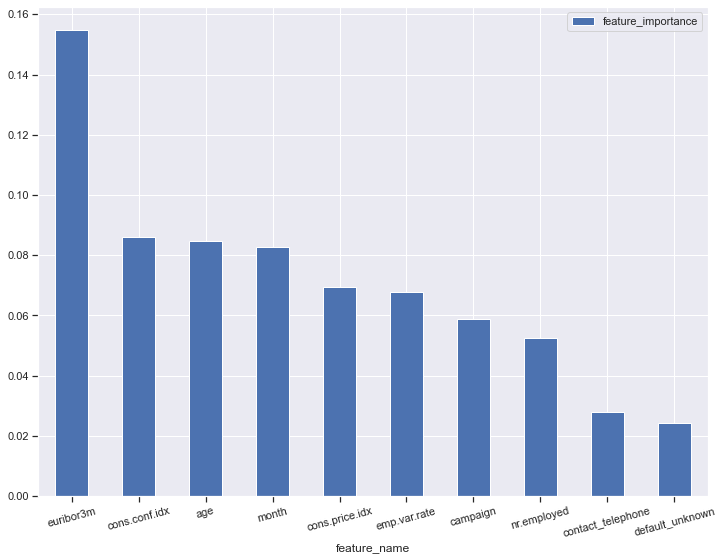

In [38]:
n_estimators = [100]
max_depths = [1, 2, 4, 6, 10]
feature_list = ['all_features']
_ = scan_parameters(n_estimators, max_depths, feature_list)

## Two observations:
1) max_depth = 1 or 2 is better

2) all economic features are included in the top 10 importmant features. Given the fact that these features are highly correlated, will it help if we only keep one of them?

## If only keep `Euribor3m` as economic features and drop other economic features, will the performance improve?

(36224, 44) (4964, 44)
evaluate for 100 estimators with max_depth = 1
evaluate for 100 estimators with max_depth = 2
(36224, 40) (4964, 40)
evaluate for 100 estimators with max_depth = 1
evaluate for 100 estimators with max_depth = 2


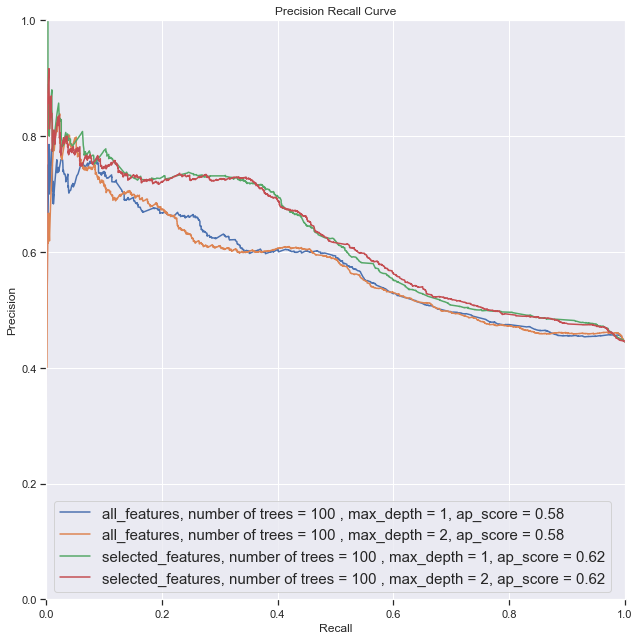

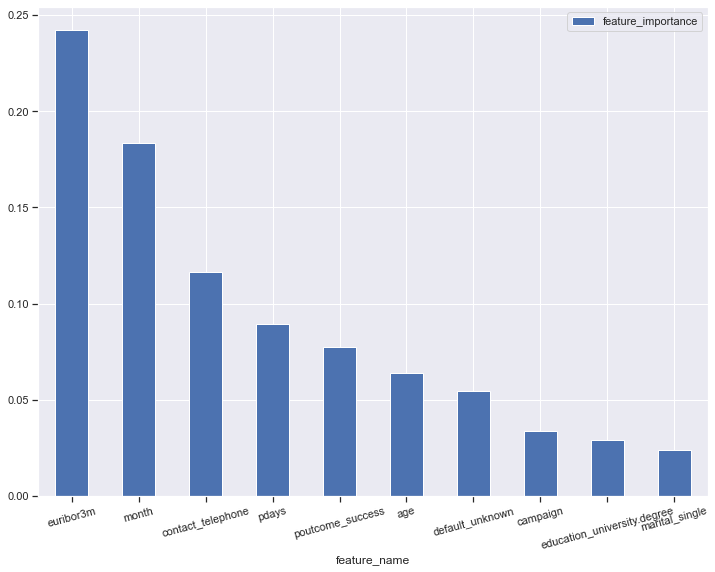

In [39]:
n_estimators = [100]
max_depths = [1,2]
feature_list = ['all_features', 'selected_features']
_ = scan_parameters(n_estimators, max_depths, feature_list)

## By keeping only one economic feature, the classifier is forced to find features related to user profile and contact information, which improves model performance, as seen from the average precision score as well as the precision recall curve. 



## Will different number of trees improve the result?

(36224, 40) (4964, 40)
evaluate for 50 estimators with max_depth = 2
evaluate for 100 estimators with max_depth = 2
evaluate for 200 estimators with max_depth = 2
evaluate for 400 estimators with max_depth = 2


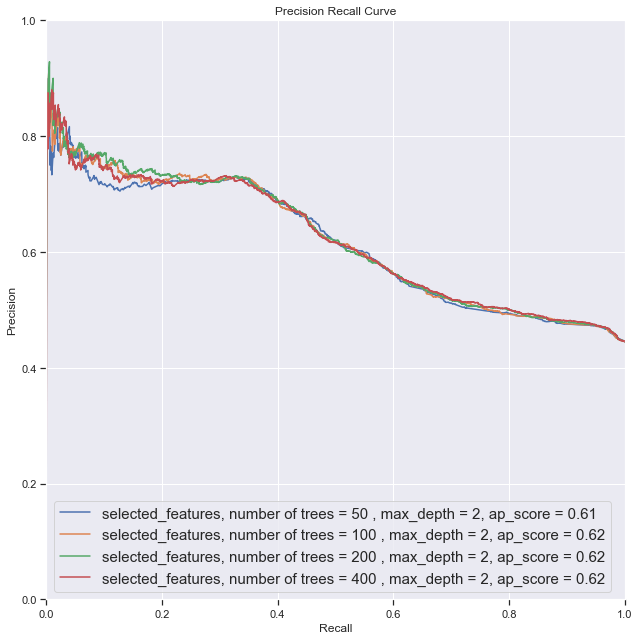

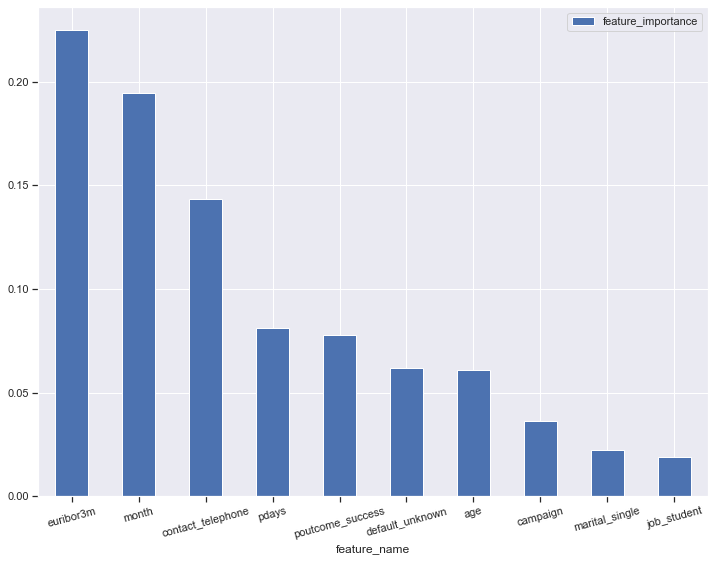

In [40]:
n_estimators = [50, 100, 200, 400]
max_depths = [2]
feature_list = ['selected_features']
_ = scan_parameters(n_estimators, max_depths, feature_list)

## n_estimator = 200 is slightly better than other values, but there isn't any significant differences

## We will use the best parameters so far, train a model and get more metric for both train and test dataset

(36224, 40) (4964, 40)
evaluate for 200 estimators with max_depth = 2
Confusion matrix for train: 
[[26413  7380]
 [ 1335  1096]]
train, Precision = 0.13 Recall = 0.45, F1 score = 0.20, Average precision score = 0.18
Classification Report for train
              precision    recall  f1-score   support

           0       0.95      0.78      0.86     33793
           1       0.13      0.45      0.20      2431

    accuracy                           0.76     36224
   macro avg       0.54      0.62      0.53     36224
weighted avg       0.90      0.76      0.81     36224

Confusion matrix for test: 
[[  17 2738]
 [   5 2204]]
test, Precision = 0.45 Recall = 1.00, F1 score = 0.62, Average precision score = 0.62
Classification Report for test
              precision    recall  f1-score   support

           0       0.77      0.01      0.01      2755
           1       0.45      1.00      0.62      2209

    accuracy                           0.45      4964
   macro avg       0.61      0.50 

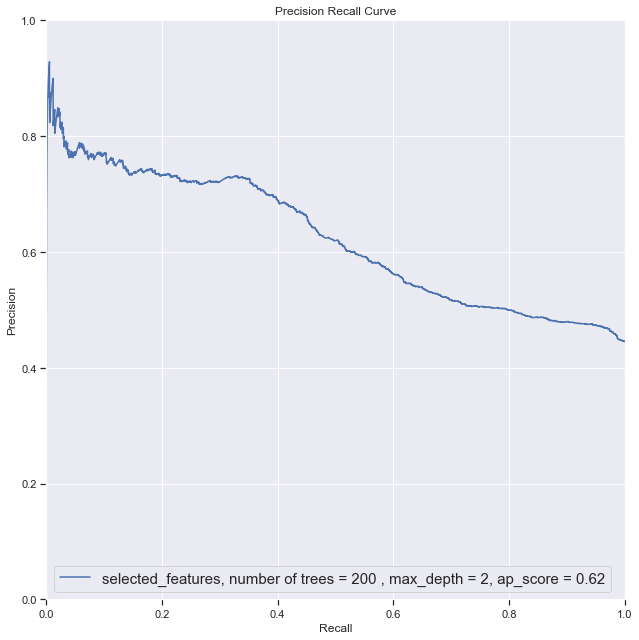

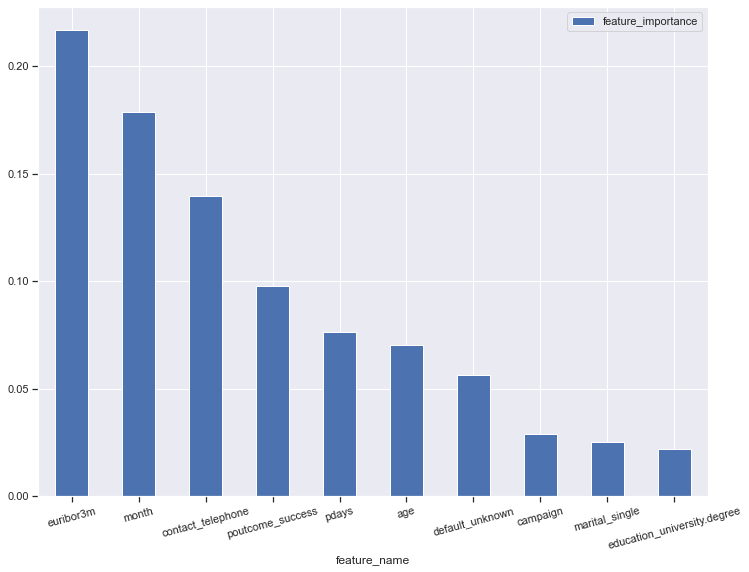

In [41]:
n_estimators = [200]
max_depths = [2]
feature_list = ['selected_features']
(precision_forest, recall_forest, ap_score) = scan_parameters(n_estimators, max_depths, feature_list, print_detail=True)

## Observations and final thoughts


1) The final model has a recall close to 1, meaning it can identify almost 100% of all positive clients. 

2) Precision is 0.45, meaning out of 100 clients that model identified as positive, only 45 of them are truly positive and the other 55 are negative. 

3) This should be acceptable because in this case study, the cost of false negative (missing a truly positive client, loss of revenue) is higher than false positive (incorrectly calls a negative user, waste of resource). 

4) If reducing false positive is desired, we can use precision-recall curve to find a balance between precision and recall.

5) Economic indicators play important roles in user behavior. During financial crisis, success rate is low to find buyers. After market recovers, the success rate is much higher.

6) Even during financial crisis, certain group of clients are still more likely to buy than other clients. For example, clients with previous success or students.

7) Machine learning model not only helps us predict how likely each client agrees to buy, it also helps us understand:
    
    a) How much business can we expect in current environment?
    
    b) Which group of user should we target?


